In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data_read = pd.read_csv('application_temp.csv')

In [4]:
data_read.head()

,“nCPU Temperature: “55000
0,“nCPU Temperature: “55000
1,“nCPU Temperature: “55000
2,“nCPU Temperature: “55000
3,“nCPU Temperature: “55000
4,“nCPU Temperature: “56000


In [5]:
data_read[['CPU', 'Temp']] = data_read['“nCPU Temperature: “55000'].str.split(':', 1, expand= True)

In [6]:
data_read = data_read.drop('“nCPU Temperature: “55000', axis =1)

In [7]:
data_read['Variable'] = data_read['CPU'].str[2:]
data_read['Temperature'] = data_read['Temp'].str[2:]

In [8]:
data_read = data_read.drop('CPU', axis =1)

In [9]:
data_read = data_read.drop('Temp', axis =1)

In [10]:
data_read.head()

,Variable,Temperature
0,CPU Temperature,55000
1,CPU Temperature,55000
2,CPU Temperature,55000
3,CPU Temperature,55000
4,CPU Temperature,56000


In [11]:
df = pd.DataFrame(data=data_read)

In [12]:
df.dtypes

Variable       object
Temperature    object
dtype: object

In [13]:
df["Temperature"] = pd.to_numeric(df.Temperature, errors='coerce')

In [14]:
df['Temperature'] = df.apply(lambda row: (row.Temperature * 0.001), axis = 1) 

In [15]:
df.dropna(inplace=True)

In [16]:
df

,Variable,Temperature
0,CPU Temperature,55.0
1,CPU Temperature,55.0
2,CPU Temperature,55.0
3,CPU Temperature,55.0
4,CPU Temperature,56.0
...,...,...
161200,CPU Temperature,62.0
161201,CPU Temperature,62.0
161202,CPU Temperature,62.0
161203,CPU Temperature,62.0


In [17]:
df.insert(2, "Time", 1)

In [18]:
df['Time'] = [f'{x:01}' for x in range(1, len(df)+1)]

In [19]:
df

,Variable,Temperature,Time
0,CPU Temperature,55.0,1
1,CPU Temperature,55.0,2
2,CPU Temperature,55.0,3
3,CPU Temperature,55.0,4
4,CPU Temperature,56.0,5
...,...,...,...
161200,CPU Temperature,62.0,161198
161201,CPU Temperature,62.0,161199
161202,CPU Temperature,62.0,161200
161203,CPU Temperature,62.0,161201


In [20]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

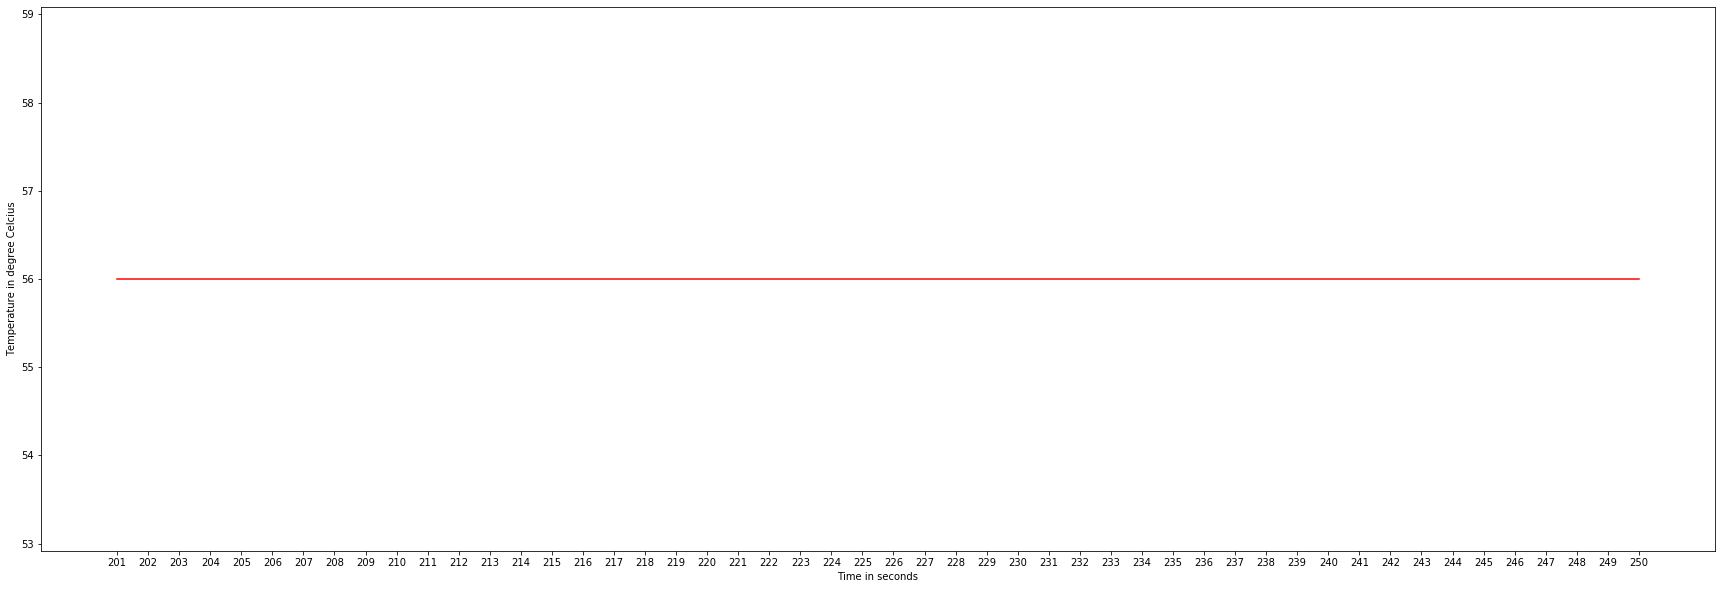

In [53]:
fig = plt.figure(figsize=(30,10))
time_graph = df.Time[200:250]
temp_graph = df.Temperature[200:250]
plt.plot( time_graph, temp_graph, 'r-')
plt.ylabel('Temperature in degree Celcius')
plt.xlabel('Time in seconds')
plt.show

In [35]:
stats_data = data_read = pd.read_fwf('log.txt')

In [36]:
stats_data.dtypes


Memory    object
Disk      object
CPU       object
dtype: object

In [37]:
stats_data.drop(stats_data.index[1], inplace=True)

In [38]:
stats_data.drop(stats_data.index[115], inplace=True)

In [39]:
stats_data

,Memory,Disk,CPU
0,18.38%,54%,0.00%
2,18.48%,54%,0.00%
3,18.58%,54%,0.00%
4,18.58%,54%,0.00%
5,18.58%,54%,0.00%
...,...,...,...
111,41.42%,54%,0.46%
112,42.13%,54%,0.62%
113,42.23%,54%,0.65%
114,42.23%,54%,0.60%


In [40]:
stats_data.insert(3, "Time", 1)

In [41]:
stats_data['Time'] = [f'{x:01}' for x in range(1, len(stats_data)+1)]

In [42]:
stats_data

,Memory,Disk,CPU,Time
0,18.38%,54%,0.00%,1
2,18.48%,54%,0.00%,2
3,18.58%,54%,0.00%,3
4,18.58%,54%,0.00%,4
5,18.58%,54%,0.00%,5
...,...,...,...,...
111,41.42%,54%,0.46%,111
112,42.13%,54%,0.62%,112
113,42.23%,54%,0.65%,113
114,42.23%,54%,0.60%,114


Text(0, 0.5, 'Usage over time')

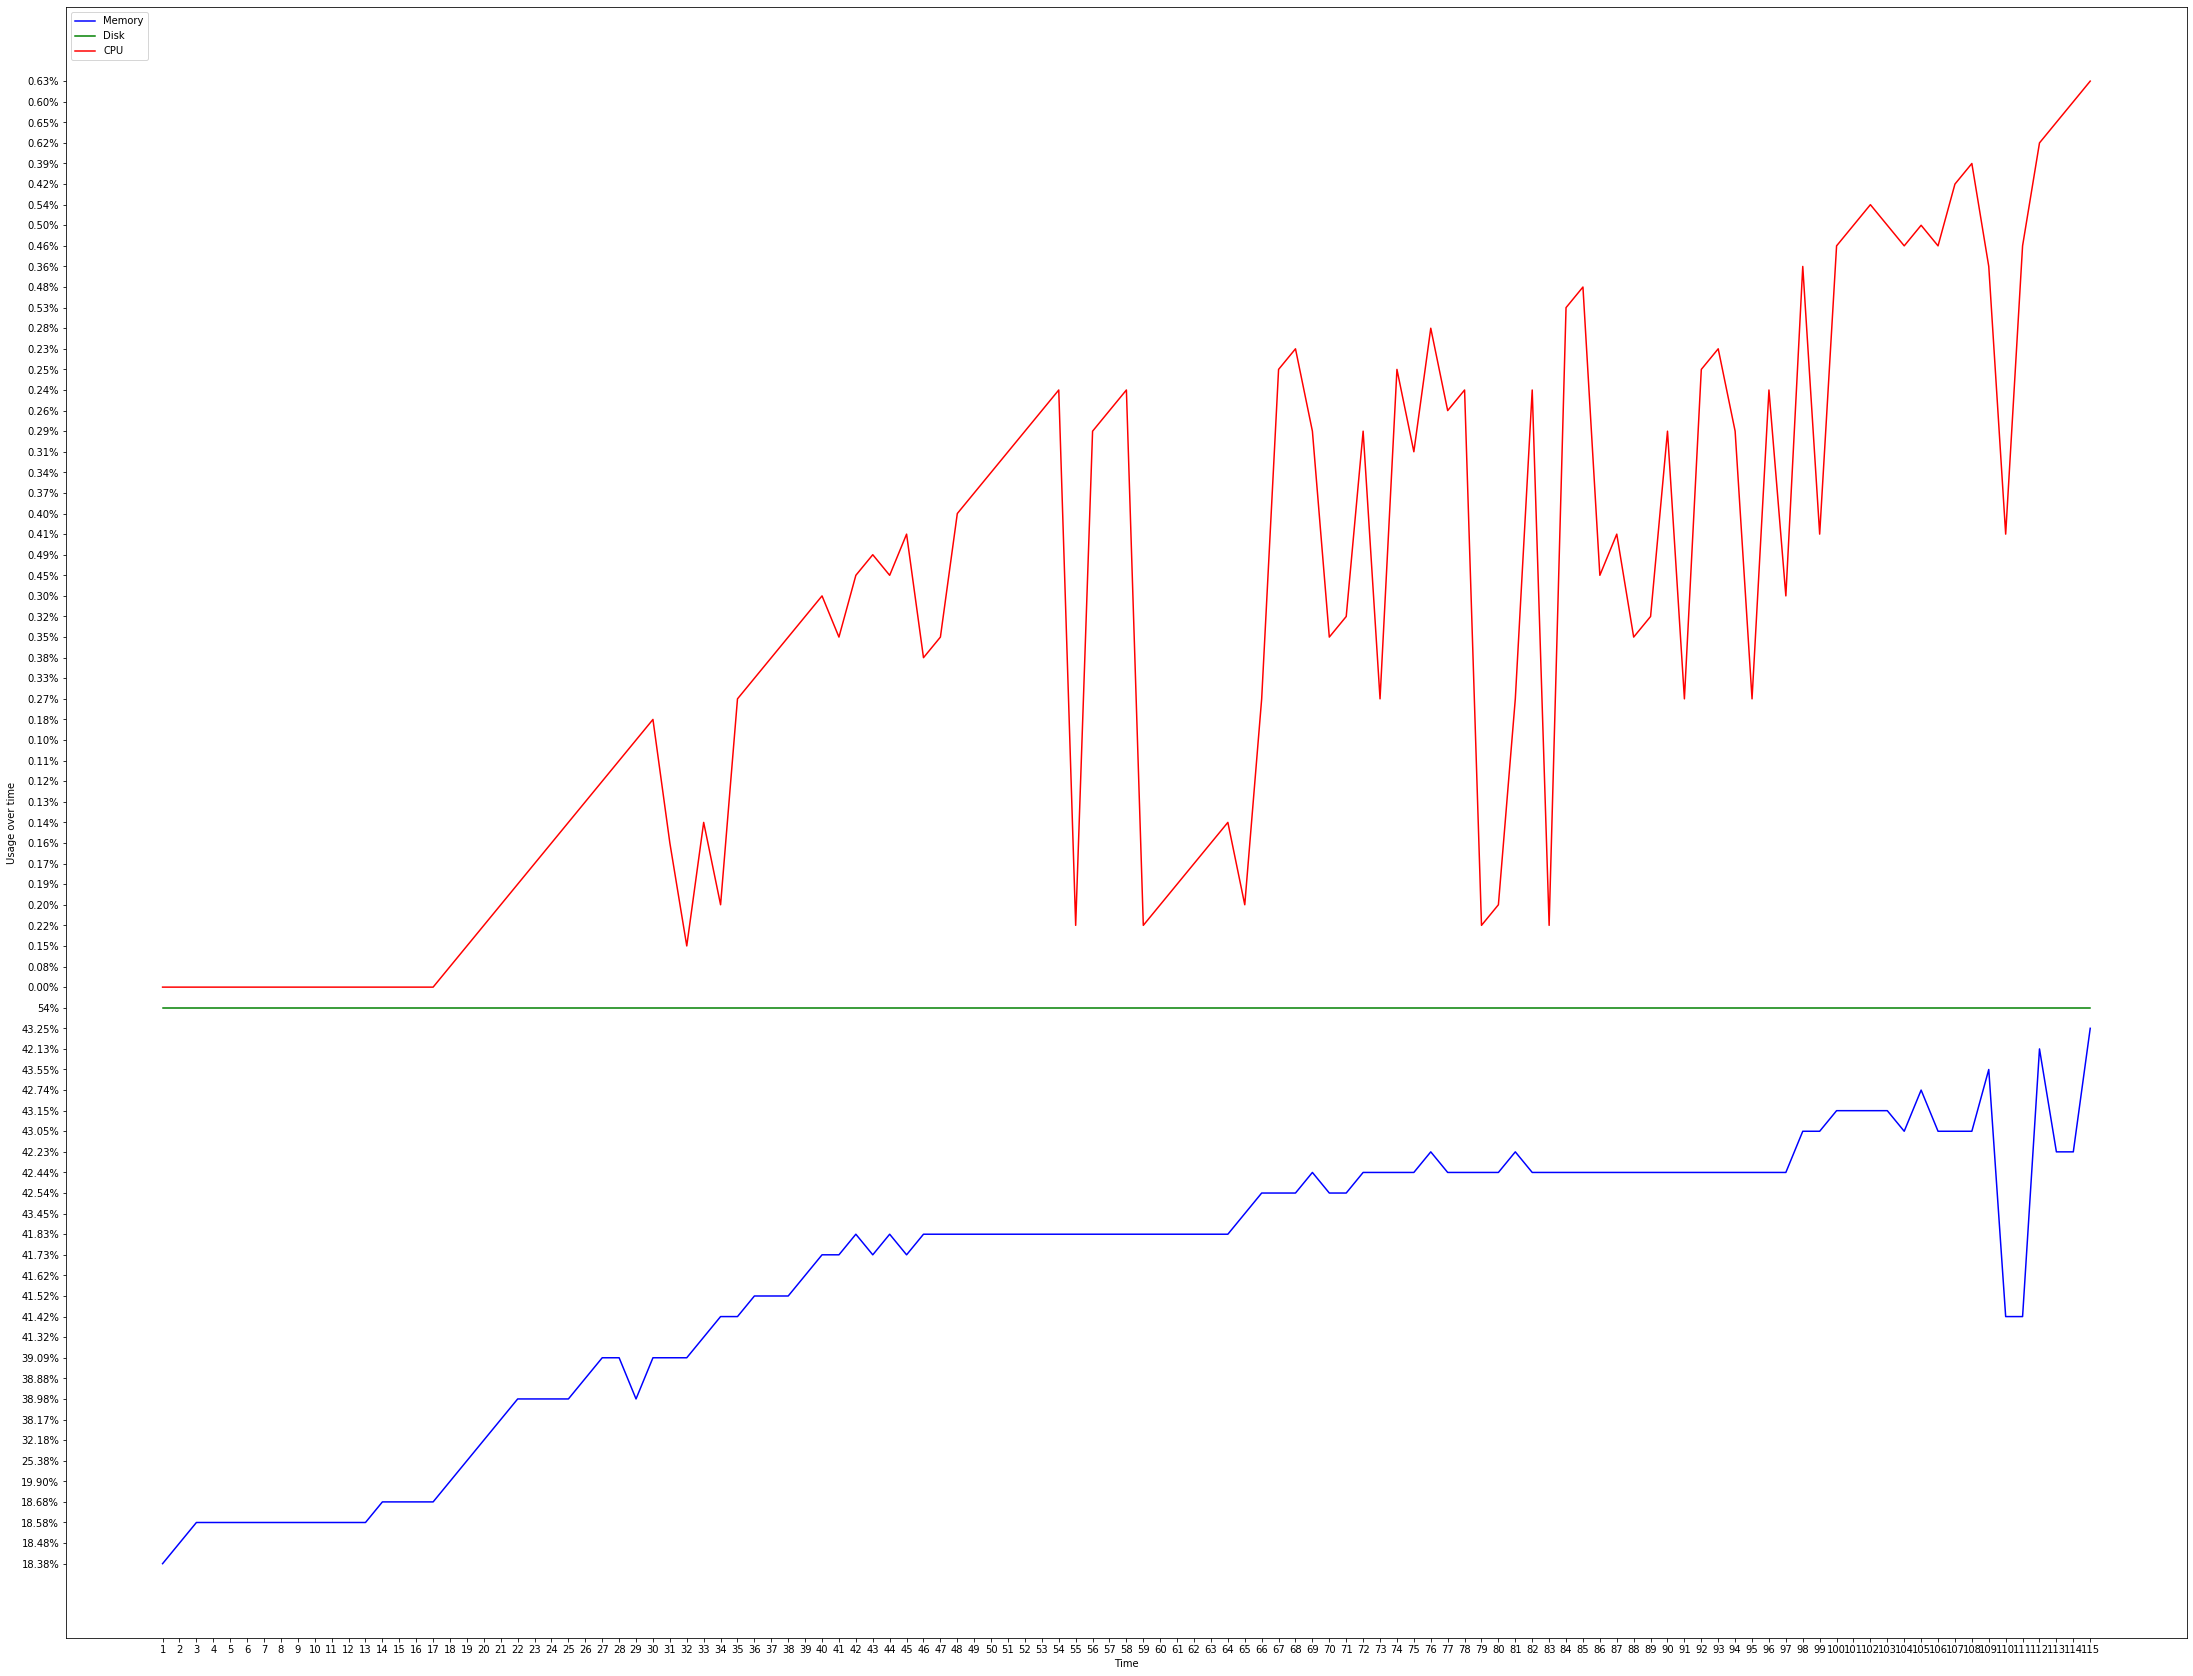

In [46]:
fig = plt.figure(figsize=(38,30))
plt.plot(stats_data['Time'], stats_data['Memory'], 'b-', label='Memory')
plt.plot(stats_data['Time'], stats_data['Disk'], 'g-', label='Disk')
plt.plot(stats_data['Time'], stats_data['CPU'], 'r-', label='CPU')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('Usage over time')


In [47]:
status_data = pd.read_csv('random.csv')

In [48]:
status_data

,Unrecognized,Recognized
0,29.989,24.433
1,29.203,24.822
2,29.282,24.639
3,29.124,24.226
4,29.098,24.893
...,...,...
494,29.688,24.137
495,29.761,24.363
496,29.089,24.041
497,29.897,24.632


<function matplotlib.pyplot.show(*args, **kw)>

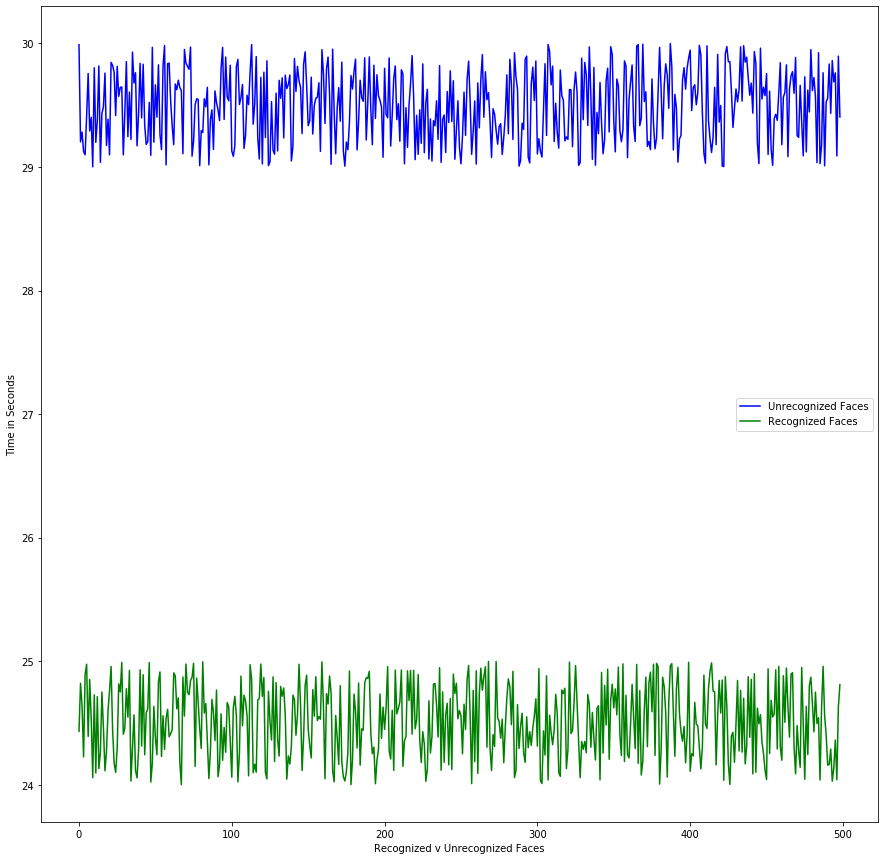

<Figure size 1440x432 with 0 Axes>

In [55]:
fig = plt.figure(figsize=(15,15))
plt.plot(status_data['Unrecognized'], 'b-', label='Unrecognized Faces')
plt.plot(status_data['Recognized'], 'g-', label='Recognized Faces')
plt.legend(loc='center right')
plt.xlabel('Recognized v Unrecognized Faces')
plt.ylabel('Time in Seconds')
plt.figure(figsize=(20,6))
plt.show
